# LAB5 Decision tree

## Decision Tree

### Import related libraries

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import ListedColormap
from sklearn import tree
from sklearn.ensemble import BaggingClassifier


Load data

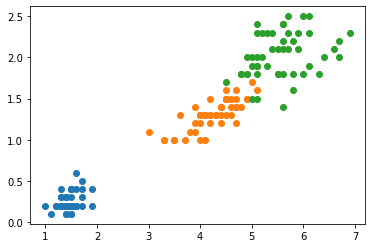

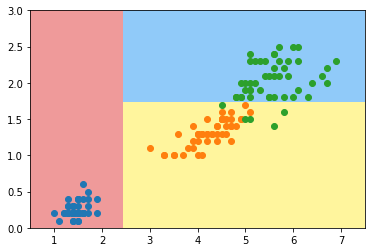

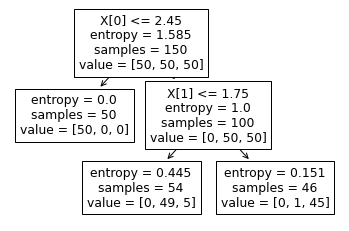

In [32]:
iris = datasets.load_iris()
x = iris.data[:, 2:]
y = iris.target

plt.scatter(x[y == 0, 0], x[y == 0, 1])
plt.scatter(x[y == 1, 0], x[y == 1, 1])
plt.scatter(x[y == 2, 0], x[y == 2, 1])
plt.show()

dt_clf = DecisionTreeClassifier(max_depth=2, criterion="entropy")
dt_clf.fit(x, y)


# DecisionTreeClassifier(class_weight=None,criterion='entropy',max_depth=2,max_features=None,max_leaf_nodes=None,min_impurity_decrease=0.0,min_impurity_split=None,min_samples_leaf=1,min_samples_split=2,min_weight_fraction_leaf=0.0,property=False,random_state=None,splitter='best')
def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0]) * 100)),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2]) * 100))
    )
    x_new = np.c_[x0.ravel(), x1.ravel()]
    y_predict = model.predict(x_new)
    zz = y_predict.reshape(x0.shape)
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])

    plt.contourf(x0, x1, zz, cmap=custom_cmap)


plot_decision_boundary(dt_clf, axis=[0.5, 7.5, 0, 3])
plt.scatter(x[y == 0, 0], x[y == 0, 1])
plt.scatter(x[y == 1, 0], x[y == 1, 1])
plt.scatter(x[y == 2, 0], x[y == 2, 1])
plt.show()

tree.plot_tree(dt_clf)
plt.show()

### Exercise 1
**criterion{“gini”, “entropy”}, default=”gini”**
The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

**splitter{“best”, “random”}, default=”best”**
The strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

**max_depthint, default=None**
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_splitint or float, default=2**
The minimum number of samples required to split an internal node:

If int, then consider min_samples_split as the minimum number.

If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.

**min_samples_leaf:int or float, default=1**
The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

* If int, then consider min_samples_leaf as the minimum number.
* If float, then min_samples_leaf is a fraction and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.

**min_weight_fraction_leaffloat, default=0.0**
The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.

**max_featuresint, float or {“auto”, “sqrt”, “log2”}, default=None**
The number of features to consider when looking for the best split:

* If int, then consider max_features features at each split.
* If float, then max_features is a fraction and int(max_features * n_features) features are considered at each split.
* If “auto”, then max_features=sqrt(n_features).
* If “sqrt”, then max_features=sqrt(n_features).
* If “log2”, then max_features=log2(n_features).
* If None, then max_features=n_features.

*Note: the search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than max_features features.*

**random_stateint, RandomState instance or None, default=None**
Controls the randomness of the estimator. The features are always randomly permuted at each split, even if splitter is set to "best". When max_features < n_features, the algorithm will select max_features at random at each split before finding the best split among them. But the best found split may vary across different runs, even if max_features=n_features. That is the case, if the improvement of the criterion is identical for several splits and one split has to be selected at random. To obtain a deterministic behaviour during fitting, random_state has to be fixed to an integer.

**max_leaf_nodesint, default=None**
Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.

**min_impurity_decreasefloat, default=0.0**
A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

**class_weightdict, list of dict or “balanced”, default=None**
Weights associated with classes in the form {class_label: weight}. If None, all classes are supposed to have weight one. For multi-output problems, a list of dicts can be provided in the same order as the columns of y.

**ccp_alphanon-negative float, default=0.0**
Complexity parameter used for Minimal Cost-Complexity Pruning. The subtree with the largest cost complexity that is smaller than ccp_alpha will be chosen. By default, no pruning is performed.

Now we discuss the classification results in terms of bias and variance
by choosing different argument values. We only consider
the **min_samples_leaf** and **criterion** for example.

[]

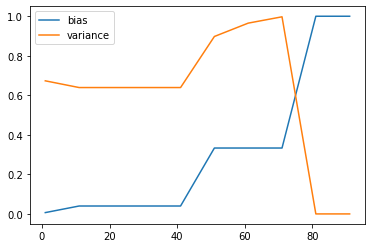

In [34]:
bias_list = []
variance_list = []

for i in range(1, 100, 10):
    dt_clf1 = DecisionTreeClassifier(min_samples_leaf=i, criterion='entropy')
    dt_clf1.fit(x, y)
    y_pred = dt_clf1.predict(x)

    bias_list.append(np.mean(np.abs(y_pred - y)))
    variance_list.append(np.var(y_pred))

plt.plot(range(1, 100, 10), bias_list, label='bias')
plt.plot(range(1, 100, 10), variance_list, label='variance')
plt.legend()
plt.plot()


We see that with the increase of **min_samples_leaf**,
the variance is simpy not change in range 40,and increase first then decrease to zero.
The bias is increase.

###Random Forest

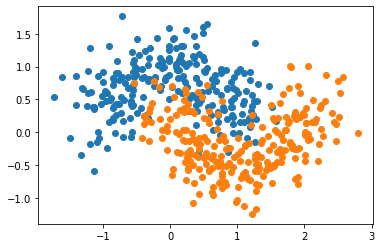

In [35]:
# create random dataset
x, y = datasets.make_moons(n_samples=500, noise=0.3, random_state=42)
plt.scatter(x[y == 0, 0], x[y == 0, 1])
plt.scatter(x[y == 1, 0], x[y == 1, 1])
plt.show()

#### bagging view

0.914


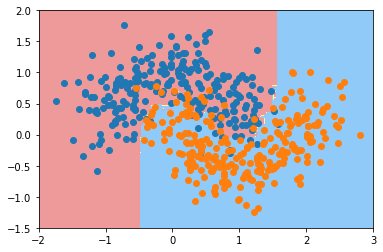

In [36]:
bagging_clf = BaggingClassifier(DecisionTreeClassifier(),
                                n_estimators=300,
                                max_samples=300,
                                bootstrap=True,  # using bootstrap sampling method
                                oob_score=True,  # use oob data for scoring
                                #n_job = 01  # use paralell computing
                                )

bagging_clf.fit(x, y)

#output oob score
print(bagging_clf.oob_score_)

plot_decision_boundary(bagging_clf, axis=[-2, 3, -1.5, 2])
plt.scatter(x[y == 0, 0], x[y == 0, 1])
plt.scatter(x[y == 1, 0], x[y == 1, 1])
plt.show()

#### RF view

0.896


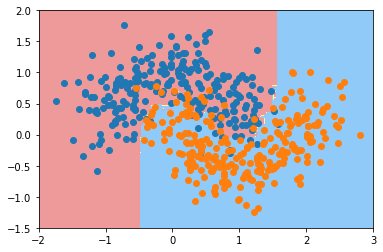

In [37]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(
    n_estimators=300,
    random_state=666,
    oob_score=True)

rf_clf.fit(x, y)
print(rf_clf.oob_score_)

plot_decision_boundary(bagging_clf, axis=[-2, 3, -1.5, 2])
plt.scatter(x[y==0, 0], x[y==0, 1])
plt.scatter(x[y==1, 0], x[y==1, 1])
plt.show()


### Exercise 2
#### RandomForestClassifier()
**n_estimatorsint, default=100**
The number of trees in the forest.

**criterion{“gini”, “entropy”}, default=”gini”**
he function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. Note: this parameter is tree-specific.

**max_depthint, default=None**
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_splitint or float, default=2**
The minimum number of samples required to split an internal node:

* If int, then consider min_samples_split as the minimum number.
* If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.

**min_samples_leafint or float, default=1**
The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.
* If int, then consider min_samples_leaf as the minimum number.
* If float, then min_samples_leaf is a fraction and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.

**min_weight_fraction_leaffloat, default=0.0**
The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.

**max_features{“auto”, “sqrt”, “log2”}, int or float, default=”auto”**
The number of features to consider when looking for the best split:

**max_leaf_nodesint, default=None**
Grow trees with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.

**min_impurity_decreasefloat, default=0.0**
A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

**bootstrapbool, default=True**
Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.

**oob_scorebool, default=False**
Whether to use out-of-bag samples to estimate the generalization score. Only available if bootstrap=True.

**n_jobsint, default=None**
The number of jobs to run in parallel. fit, predict, decision_path and apply are all parallelized over the trees.

**random_stateint, RandomState instance or None, default=None**
Controls both the randomness of the bootstrapping of the samples used when building trees (if bootstrap=True) and the sampling of the features to consider when looking for the best split at each node (if max_features < n_features).

**verboseint, default=0**
Controls the verbosity when fitting and predicting.

**warm_startbool, default=False**
When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new forest. See the Glossary.

**class_weight{“balanced”, “balanced_subsample”}, dict or list of dicts, default=None**
Weights associated with classes in the form {class_label: weight}.


**ccp_alphanon-negative float, default=0.0**
Complexity parameter used for Minimal Cost-Complexity Pruning.
New in version 0.22.

**max_samplesint or float, default=None**
If bootstrap is True, the number of samples to draw from x to train each base estimator.

#### BaggingClassifier()
**base_estimatorobject, default=None**
The base estimator to fit on random subsets of the dataset. If None, then the base estimator is a DecisionTreeClassifier.

**n_estimatorsint, default=10**
The number of base estimators in the ensemble.

**max_samplesint or float, default=1.0**
The number of samples to draw from x to train each base estimator (with replacement by default, see bootstrap for more details).

**bootstrapbool, default=True**
Whether samples are drawn with replacement. If False, sampling without replacement is performed.

**bootstrap_featuresbool, default=False**
Whether features are drawn with replacement.

**oob_scorebool, default=False**
Whether to use out-of-bag samples to estimate the generalization error. Only available if bootstrap=True.

**warm_startbool, default=False**
When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new ensemble.
**n_jobsint, default=None**
The number of jobs to run in parallel for both fit and predict.
**random_stateint, RandomState instance or None, default=None**
Controls the random resampling of the original dataset (sample wise and feature wise).
**verboseint, default=0**
Controls the verbosity when fitting and predicting.

Now we discuss the classification results in terms of bias and variance by choosing different argument values.
We only consider the BaggingClassifier for example.


[]

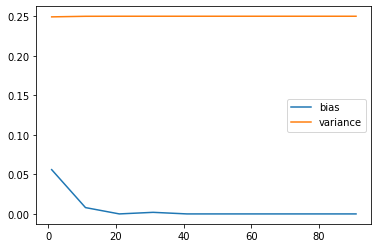

In [38]:
bias_list = []
variance_list = []

for i in range(1, 100, 10):
    rf_clf1 = BaggingClassifier(
        n_estimators=i,
        random_state=666)

    rf_clf1.fit(x, y)
    y_pred = rf_clf1.predict(x)

    bias_list.append(np.mean(np.abs(y_pred - y)))
    variance_list.append(np.var(y_pred))

# print(bias_list)
# print(variance_list)
plt.plot(range(1, 100, 10), bias_list, label='bias')
plt.plot(range(1, 100, 10), variance_list, label='variance')
plt.legend()
plt.plot()



We see that with the increase of **n_estimators**, the variance is simpy not change.The bias is decrease and limit to zero.

### Question

**Question 1:**
YES,
The random forest algorithm is a supervised learning model, it uses labeled data to “learn” how to classify unlabeled data.

**Question 2:**
Advantages to using decision trees:
1. Easy to interpret and make for straightforward visualizations.
2. The internal workings are capable of being observed and thus make it possible to reproduce work.
3. Can handle both numerical and categorical data.
4. Perform well on large datasets
5. Are extremely fast

if the dataset's error due to bias and variance is rather large. Using random decision trees, it performs well.

**Question 3:**
Disadvantages to using decision trees:
1. Decision trees are prone to overfitting, especially when a tree is particularly deep.
2. Building decision trees require algorithms capable of determining an optimal choice at each node. It means it makes the most optimal decision at each step, but does not take into account the global optimum.
3. It requires much computational power as well as resources as it builds numerous trees to combine their outputs.
4. It also requires much time for training as it combines a lot of decision trees to determine the class.
5. Due to the ensemble of decision trees, it also suffers interpretability and fails to determine the significance of each variable.

when meet the above situation occurs, it would perform bad.

**Question 4:**
Decision trees are very good at non-linear model and on big datasets.
